In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from dmft_bethe import DMFT_bethe
U_list = np.linspace(0, 2, 10)
#U_list = [0.75, 1.5]
data = {}
for U in U_list:
    print(f"======== U = {U} =======")
    precision = 0.001
    t = 0.25
    mu = U/2
    beta = 50
    n_site_bain = 4
    N = 100
    sig_imp, g_imp_nplus1, valeurs_prop, vecteurs_prop, data[U] = DMFT_bethe(precision=precision,
                                                                             U=U, t=t, mu=mu,
                                                                             beta=beta, n_site_bain=n_site_bain, N=N)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
======== U = 0.0 =======
=== DMFT loop 0 ===
occ =  (1.000000586886623+1.3343635089324804e-17j)


### Debugging hybridization issue

In [ ]:
delta_pb = np.load("delta.npy") # file that is output if fitting does not succeed
print(np.hstack([np.ones(3), np.ones(3)]).shape)
plt.plot(delta_pb.imag)

from dmft_bethe import fit_curve, delta_appro

omegas = np.array([(2 * n + 1) * np.pi / beta  for n in range(N)])
n_site_bain = 4
x, pcov = fit_curve(delta = delta_pb,omegas = omegas, n=n_site_bain)

delta_fit = delta_appro(omegas, *x)
delta_fit = delta_fit[:len(delta_fit)//2] + 1j*delta_fit[len(delta_fit)//2:]

print(x)

plt.plot(delta_pb.imag)
plt.plot(delta_fit.imag)

## $Z$ vs $U$

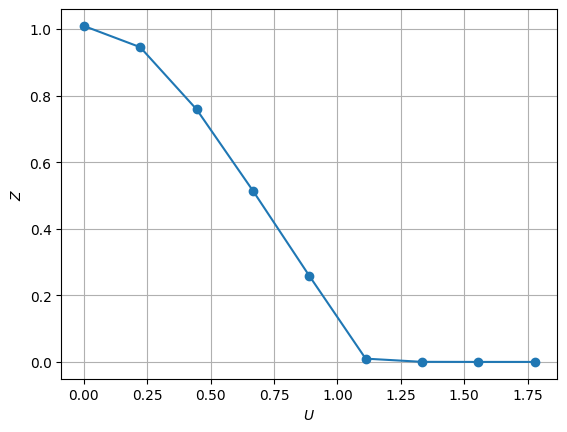

In [16]:
val_list = []
for U in U_list:
    obs = "sig_imp"
    #obs = "g_imp_nplus1"
    val = None
    for loop_ind in range(1, 10):
        try:
            # Z = 1/(1 - Sig''(iomega_0)/omega_0)
            val = 1/(1-data[U][f"{obs}_{loop_ind}"][0].imag / (np.pi/beta))
        except:
            pass
    val_list.append(val)
plt.plot(U_list, val_list, '-o')    
plt.grid()
if obs == "sig_imp":
    #plt.ylabel(r"$\mathrm{Im}\Sigma_\mathrm{imp}(i\omega_0)$")
    plt.ylabel(r"$Z$")
else:
    plt.ylabel(r"$\mathrm{Im} G_\mathrm{imp}(i\omega_0)$")
plt.xlabel(r"$U$");

## Plotting convergence info

### $\Delta(i\omega_n)$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

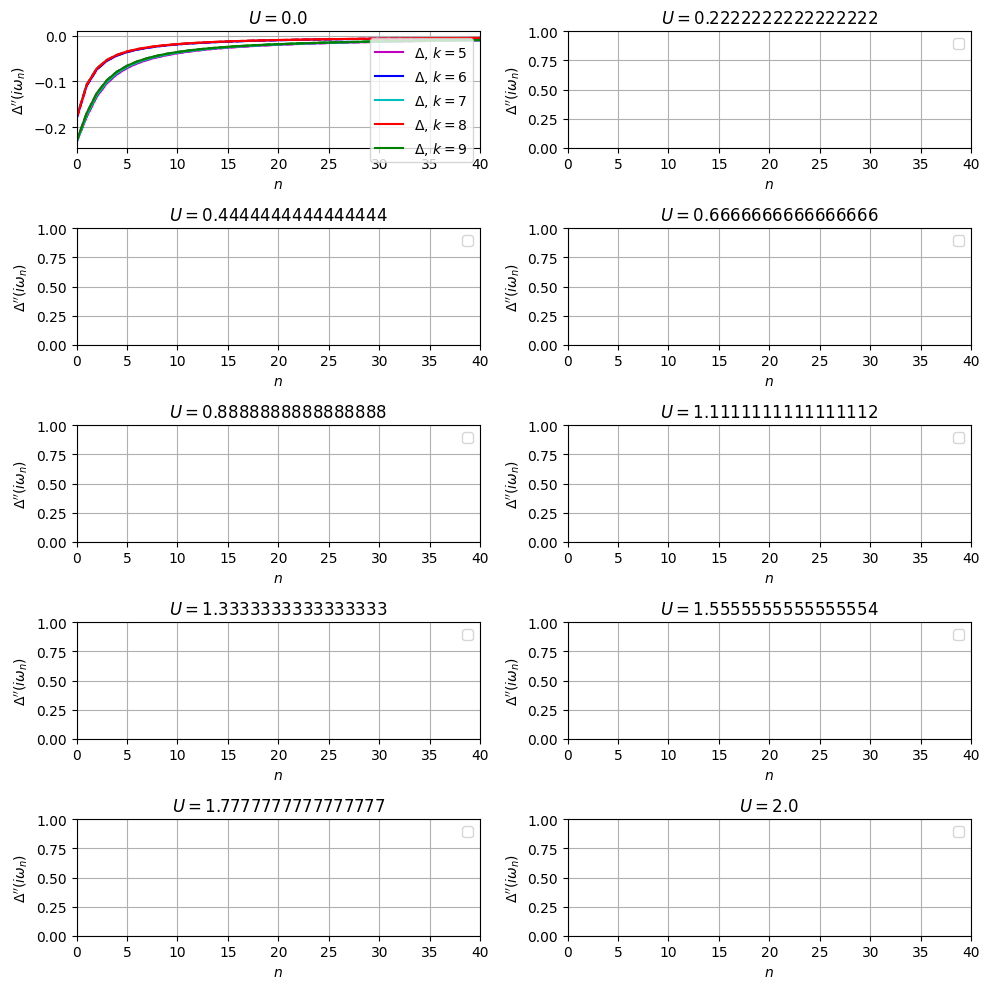

In [18]:

from matplotlib.gridspec import GridSpec
gs = GridSpec(5, 2)
plt.figure(figsize=(10, 10))
for ind, U in enumerate(U_list):
    plt.subplot(gs[ind])
    plt.title(f"$U={U}$")
    cols = ['m','b','c','r','g']
    for n_iter in range(5, 10):
        try:
            plt.plot(data[U][f"delta_fit_{n_iter}"].imag, "--"+cols[n_iter%5])
            plt.plot(data[U][f"delta_{n_iter}"].imag, "-"+cols[n_iter%5], label =f"$\Delta$, $k={n_iter}$")
        except:
            pass
    plt.legend()
    plt.grid()
    plt.xlabel("$n$")
    plt.xlim(0, 40)
    plt.ylabel("$\Delta '' (i\omega_n)$")
plt.tight_layout()

### $\Delta(\omega)$

In [ ]:
gs = GridSpec(5, 2)
plt.figure(figsize=(10, 10))
for ind, U in enumerate(U_list):
    plt.subplot(gs[ind])
    plt.title(f"$U={U}$")
    for n_iter in range(3, 10):
        try:
            v_list = data[U][f"fit_params_{n_iter}"][n_site_bain:]
            epsilon_list = data[U][f"fit_params_{n_iter}"][:n_site_bain]

            omegas = np.linspace(-2, 2, 100)
            eta = (omegas[1] - omegas[0])*3
            delta_vals = np.array(sum([v**2/(omegas - eps + eta*1j) for v, eps in zip(v_list, epsilon_list)]))


            plt.plot(omegas, delta_vals.imag, label =f"$k={n_iter}$")
        except:
            pass
    plt.legend()
    plt.xlabel("$\omega$")
    plt.ylabel("$\Delta ''(\omega)$")
    plt.grid()
plt.tight_layout()